In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Imports from parent directory
original_cur_dir = getcwd()
chdir('..')
from ResultsAnalyzer import ResultsAnalyzer
# Go back to current directory
chdir(original_cur_dir)

# General configuration

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
experiment_main_dir = 'Experiment'
anom_comm_names = [f'comm0{i+1}' for i in range(110, 120)]

In [5]:
res_analyzer = ResultsAnalyzer(experiment_main_dir, EXPERIMENT_SETTINGS, anom_comm_names)

# Meta-Features predictive ranking ability comparison

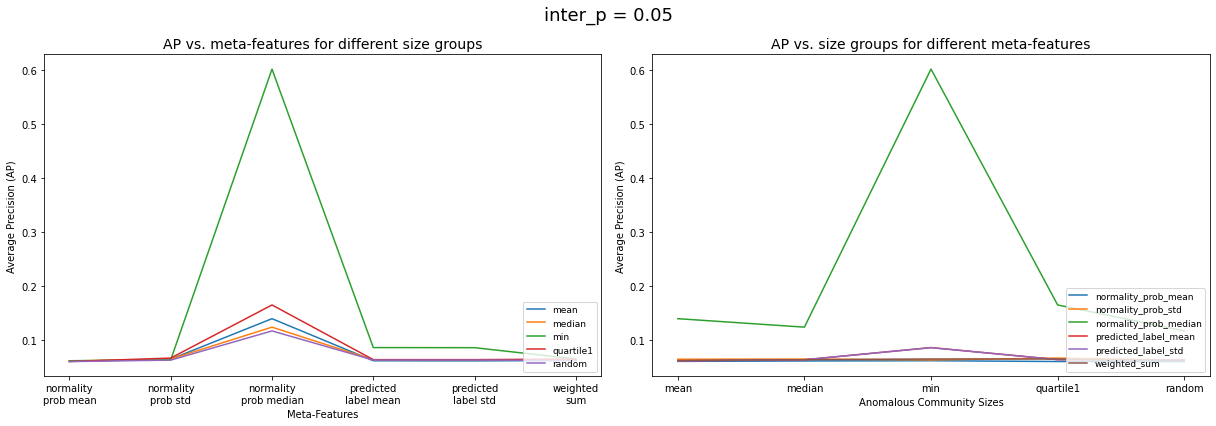

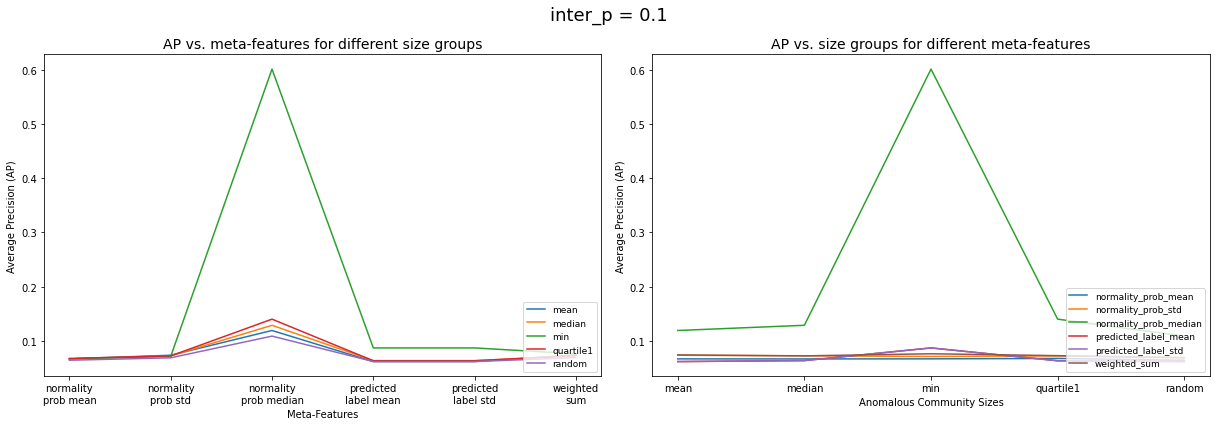

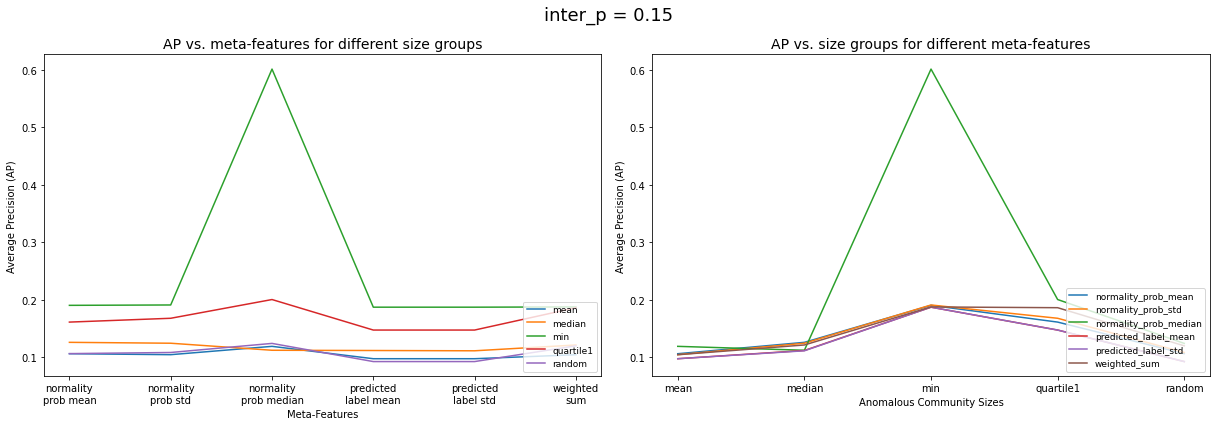

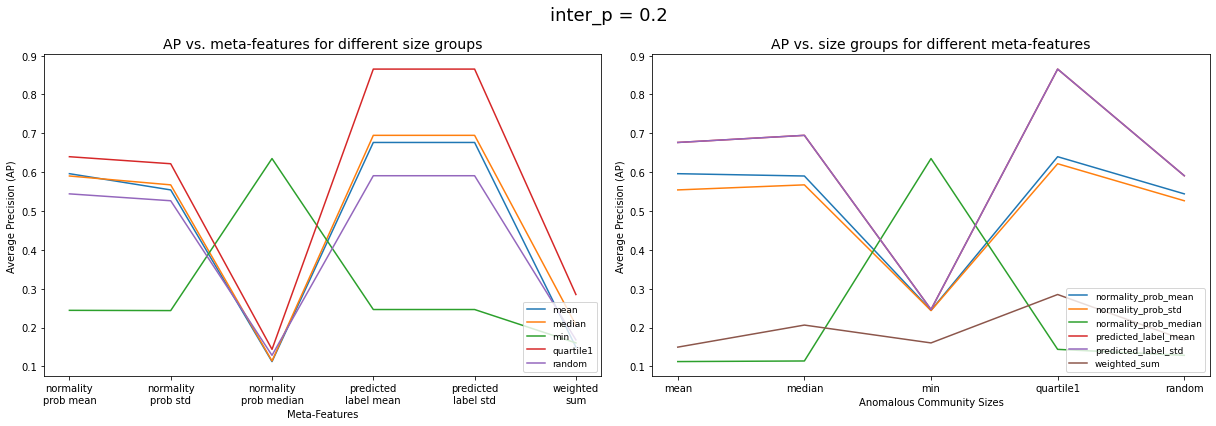

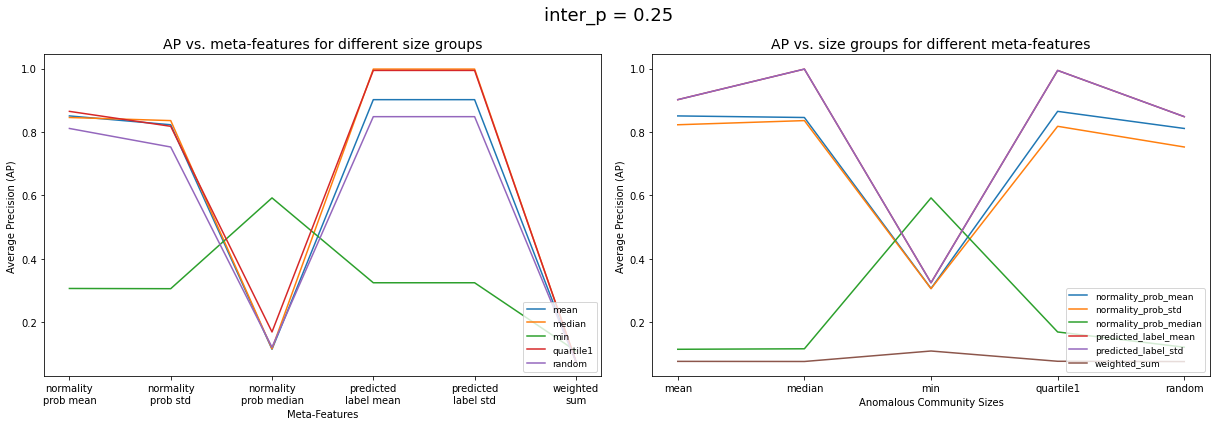

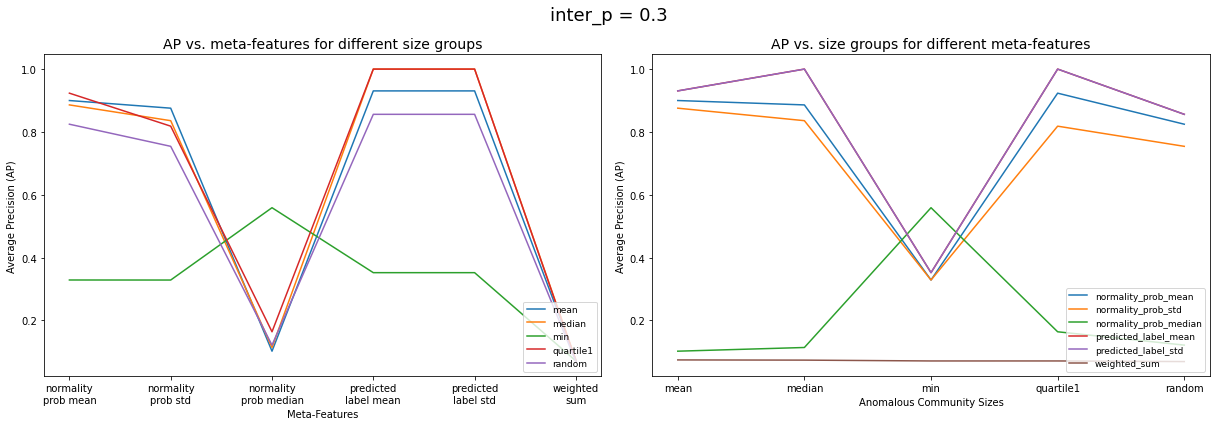

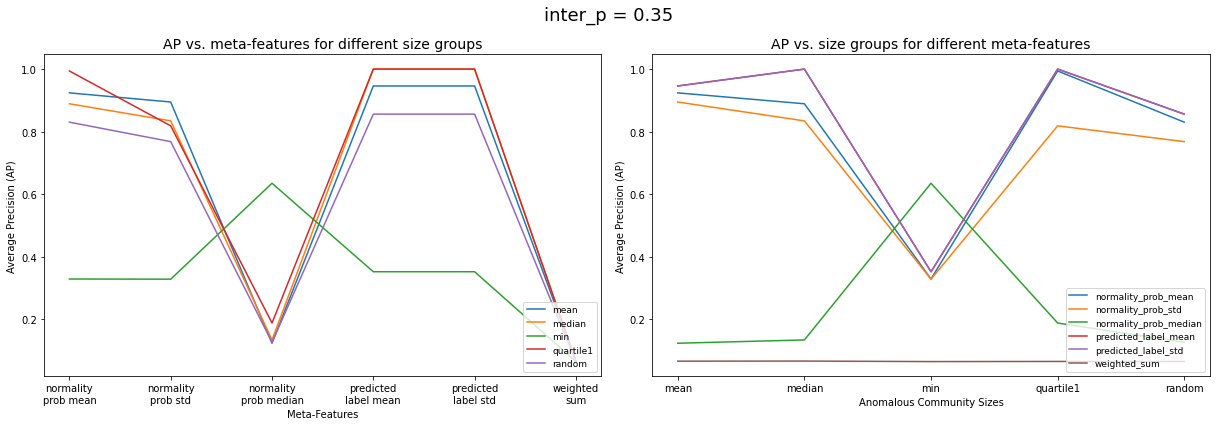

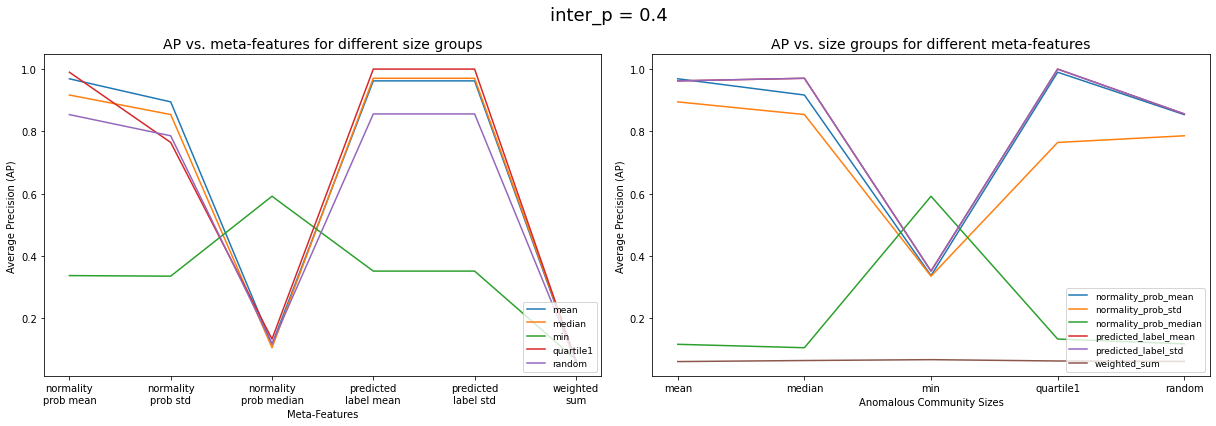

In [6]:
res_analyzer.plot_meta_features_comparison_grouped_by_ps_size_groups(skip_median=False)

In [7]:
meta_features_comparison_df = res_analyzer.get_meta_features_comparison_df()
meta_features_comparison_df.head()

,normality_prob_mean,normality_prob_std,normality_prob_median,predicted_label_mean,predicted_label_std,weighted_sum
anom_inter_p,,,,,,
0.050,0.061,0.064,0.229,0.068,0.067,0.063
0.100,0.066,0.071,0.220,0.067,0.067,0.073
0.150,0.138,0.139,0.231,0.127,0.127,0.144
0.200,0.523,0.503,0.227,0.615,0.615,0.194
0.250,0.736,0.707,0.223,0.813,0.813,0.083


In [8]:
meta_features_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,normality_prob_mean,normality_prob_std,normality_prob_median,predicted_label_mean,predicted_label_std,weighted_sum
mean,0.488,0.458,0.225,0.522,0.522,0.095
median,0.629,0.605,0.225,0.714,0.714,0.072
std,0.343,0.313,0.010,0.367,0.368,0.048


# Evaluate with different parameters 

## Anom_inter_p

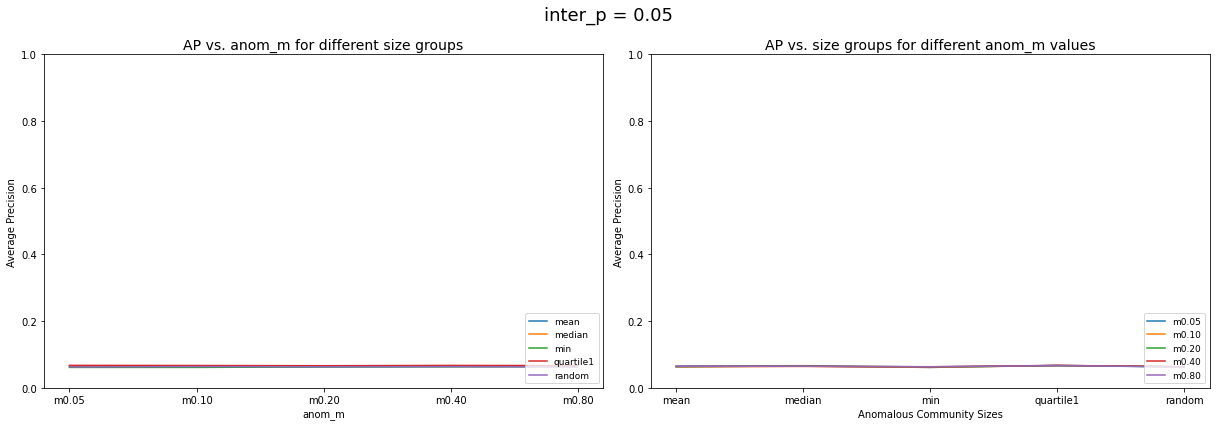

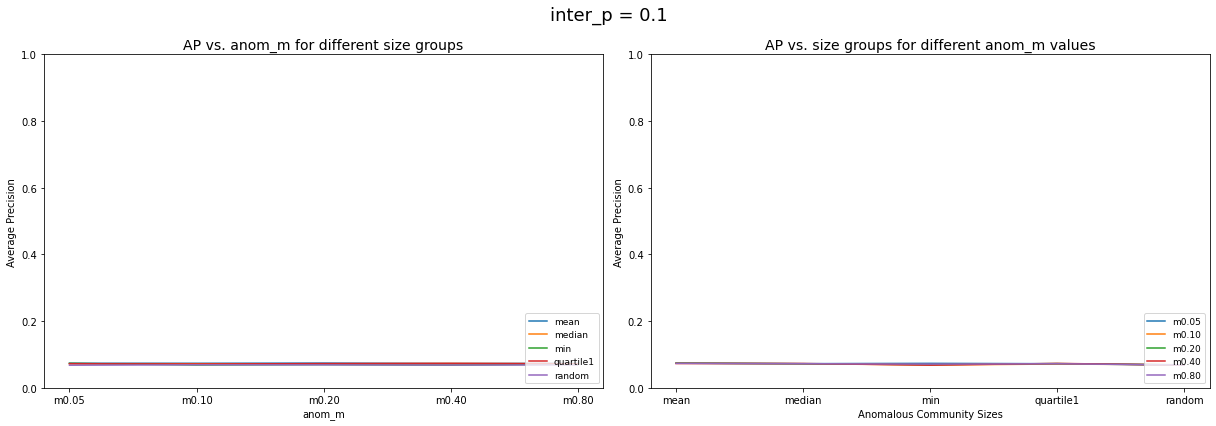

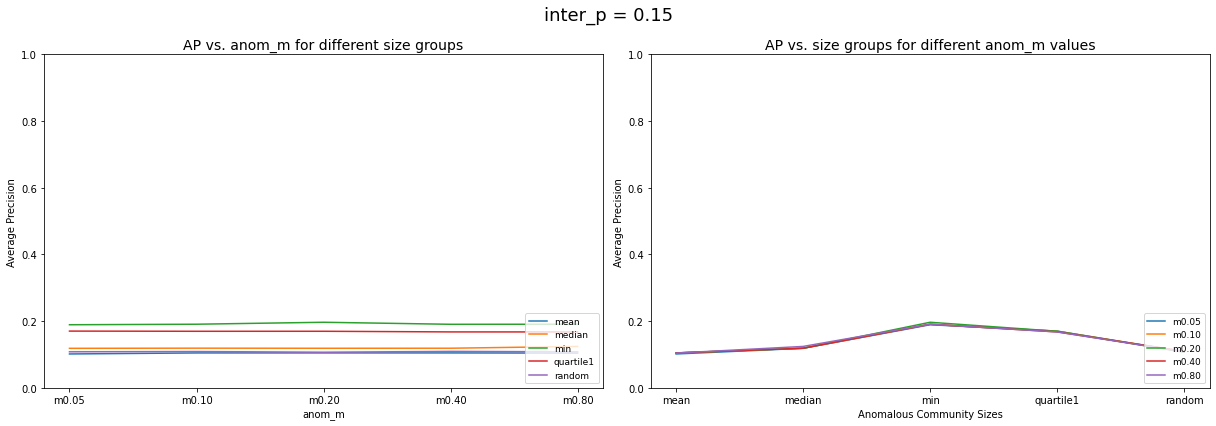

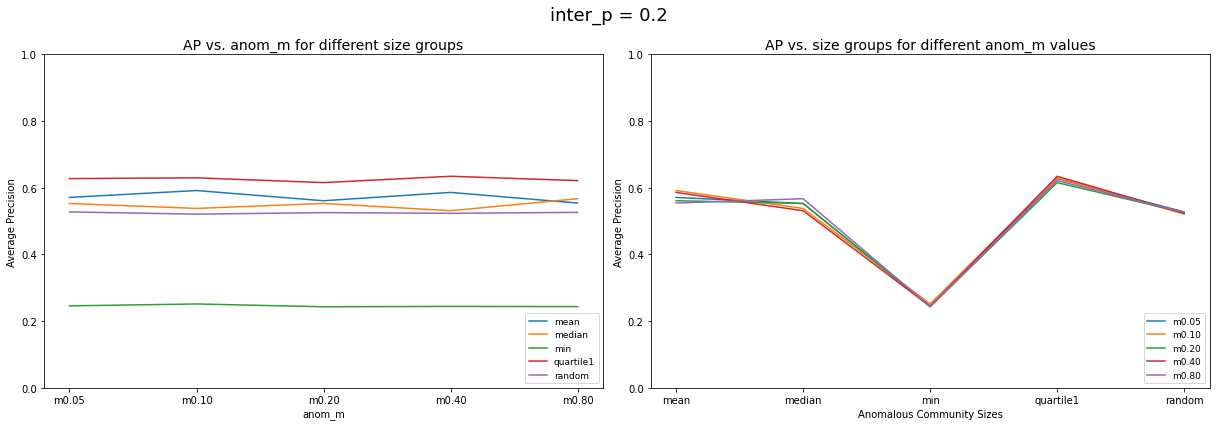

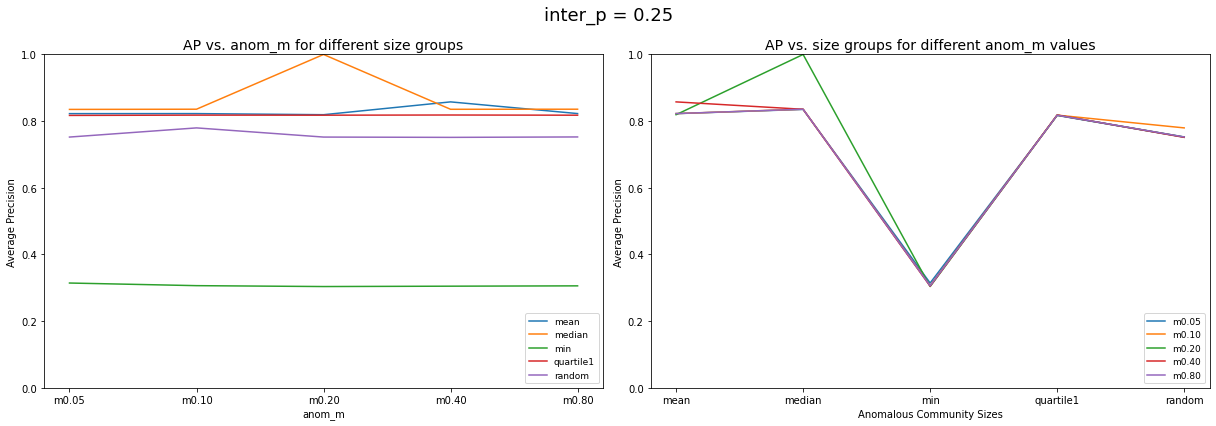

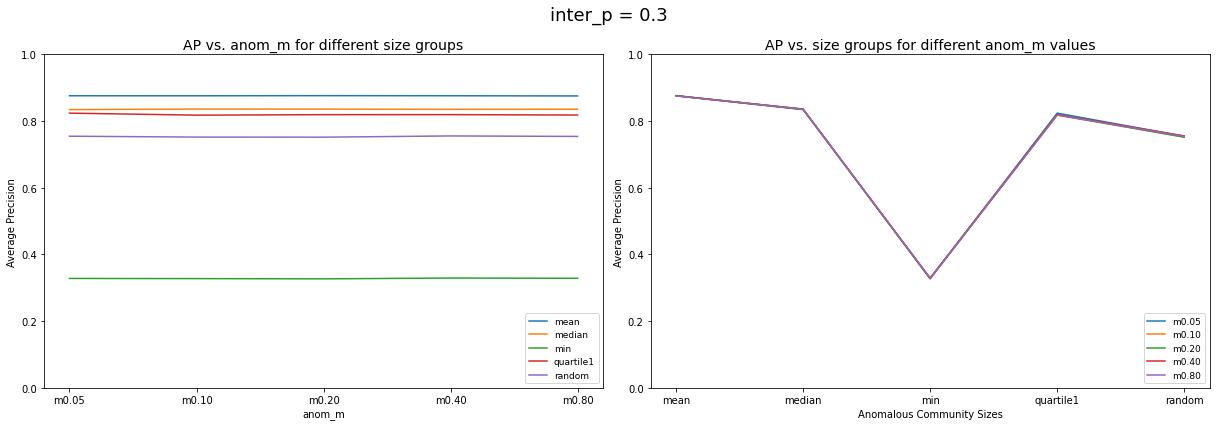

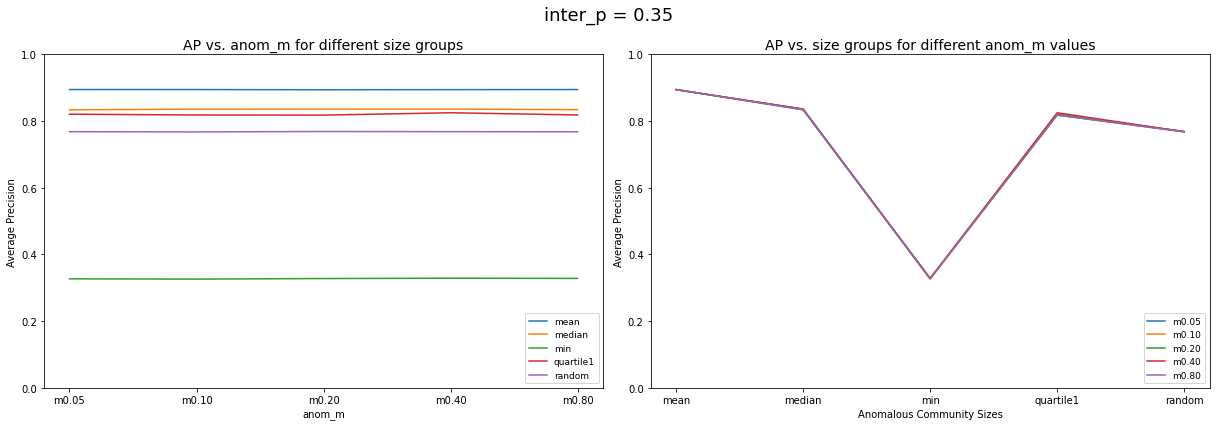

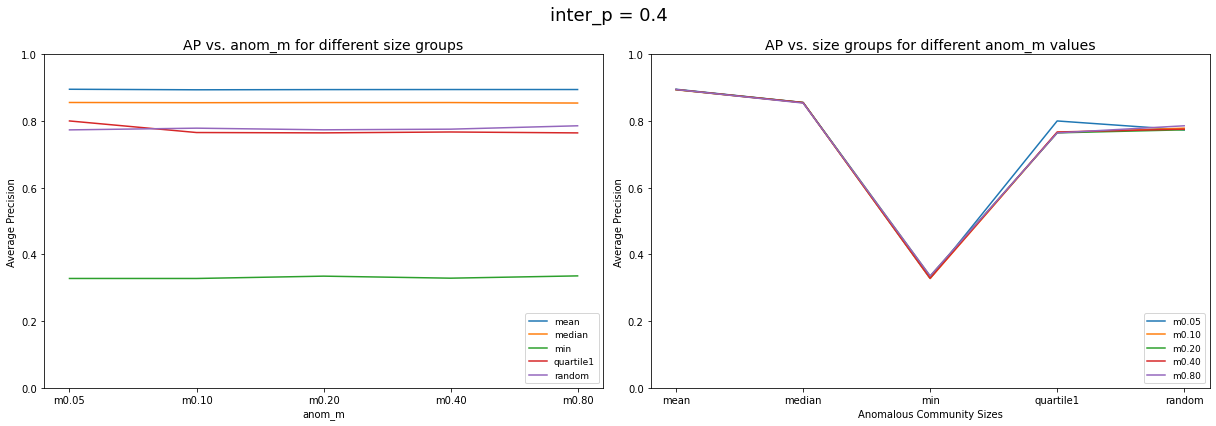

In [9]:
res_analyzer.plot_grouped_by_ps_ms_and_size_groups('normality_prob_std')

In [10]:
ps_comparison_df = res_analyzer.get_ps_comparison_df('normality_prob_std')
ps_comparison_df

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
size_group,,,,,,,,
min,0.062,0.070,0.192,0.246,0.307,0.328,0.328,0.331
quartile1,0.067,0.072,0.169,0.626,0.818,0.820,0.820,0.773
median,0.065,0.072,0.120,0.549,0.868,0.836,0.835,0.855
mean,0.064,0.074,0.104,0.573,0.829,0.876,0.895,0.895
random,0.063,0.069,0.108,0.525,0.758,0.754,0.768,0.778


In [11]:
ps_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
mean,0.064,0.071,0.138,0.504,0.716,0.723,0.729,0.726
median,0.064,0.072,0.120,0.549,0.818,0.820,0.820,0.778
std,0.002,0.002,0.039,0.149,0.232,0.225,0.229,0.227


## Anom_inter_m

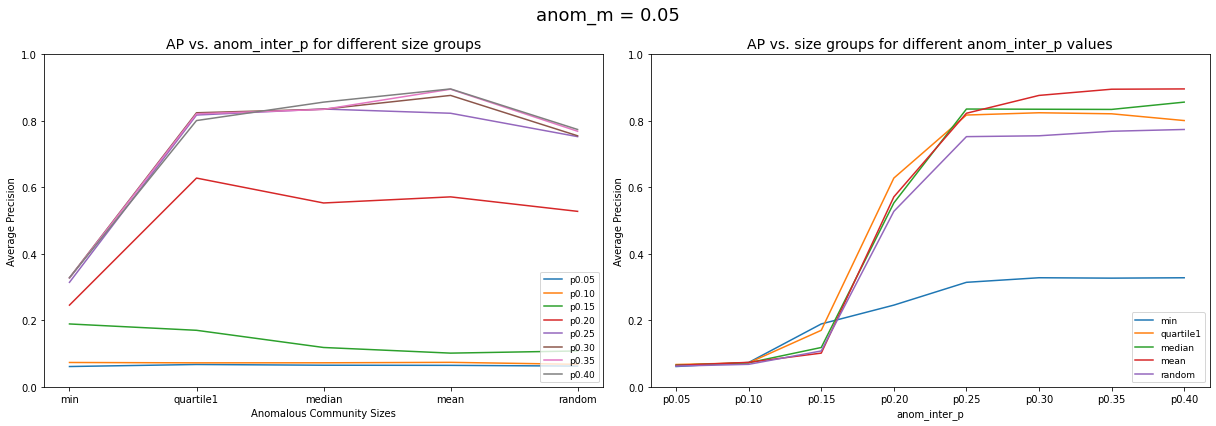

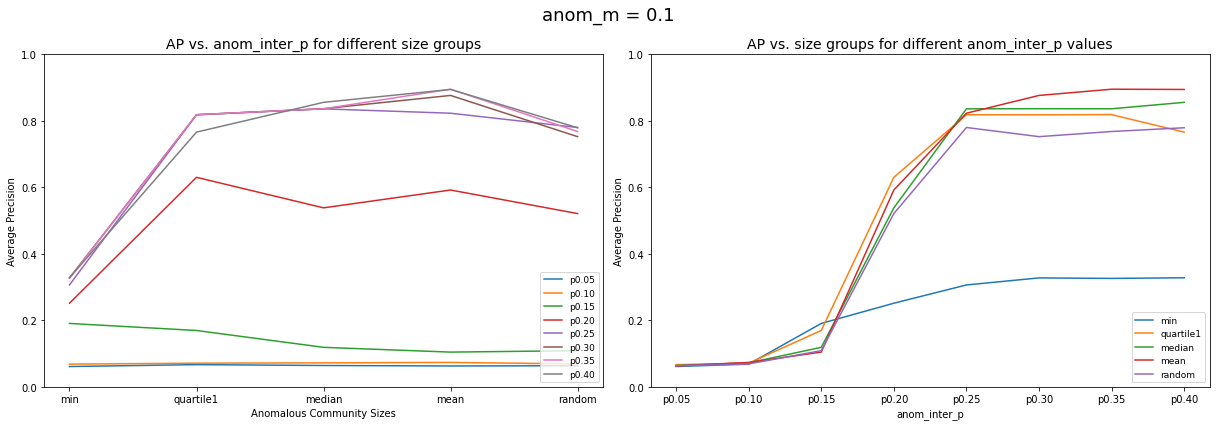

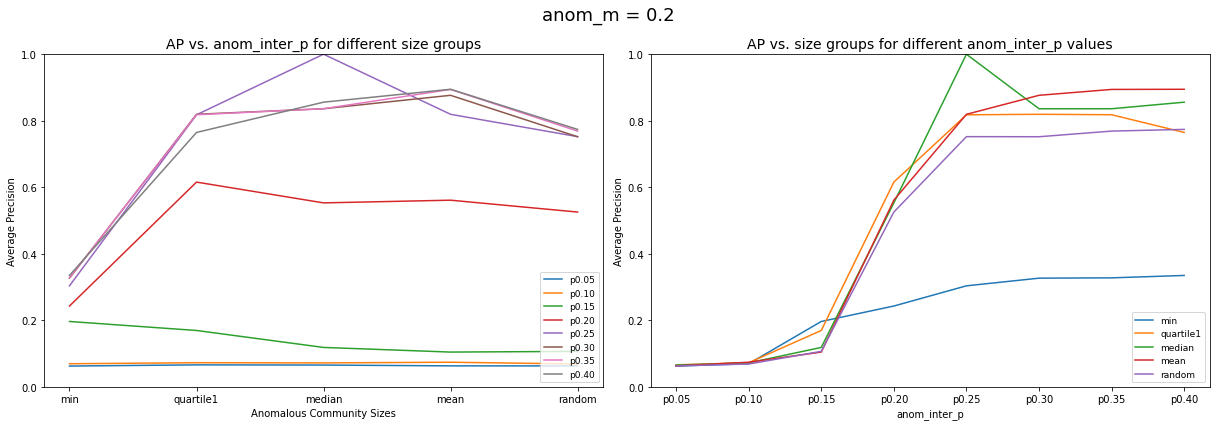

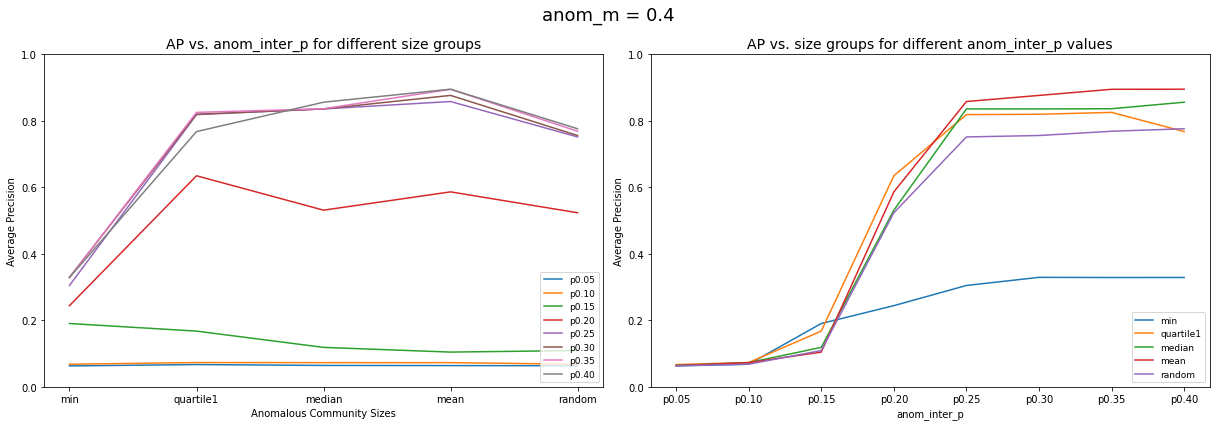

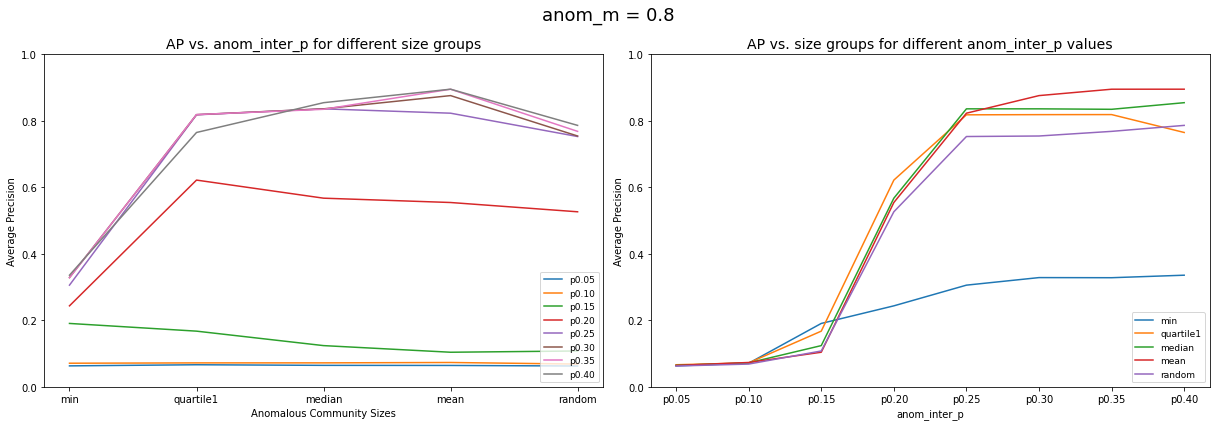

In [12]:
res_analyzer.plot_grouped_by_m_ps_and_size_groups('normality_prob_std')

In [13]:
ms_comparison_df = res_analyzer.get_ms_comparison_df('normality_prob_std')
ms_comparison_df

,0.05,0.1,0.2,0.4,0.8
anom_inter_p,,,,,
p0.05,0.064,0.064,0.064,0.064,0.064
p0.10,0.072,0.071,0.071,0.071,0.071
p0.15,0.137,0.139,0.139,0.138,0.139
p0.20,0.505,0.506,0.500,0.504,0.503
p0.25,0.708,0.713,0.739,0.714,0.707
p0.30,0.724,0.722,0.722,0.723,0.722
p0.35,0.729,0.729,0.729,0.731,0.729
p0.40,0.731,0.724,0.725,0.725,0.727


In [14]:
ms_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.2,0.4,0.8
mean,0.459,0.458,0.461,0.459,0.458
median,0.607,0.609,0.611,0.609,0.605
std,0.314,0.314,0.316,0.314,0.313


## Size groups

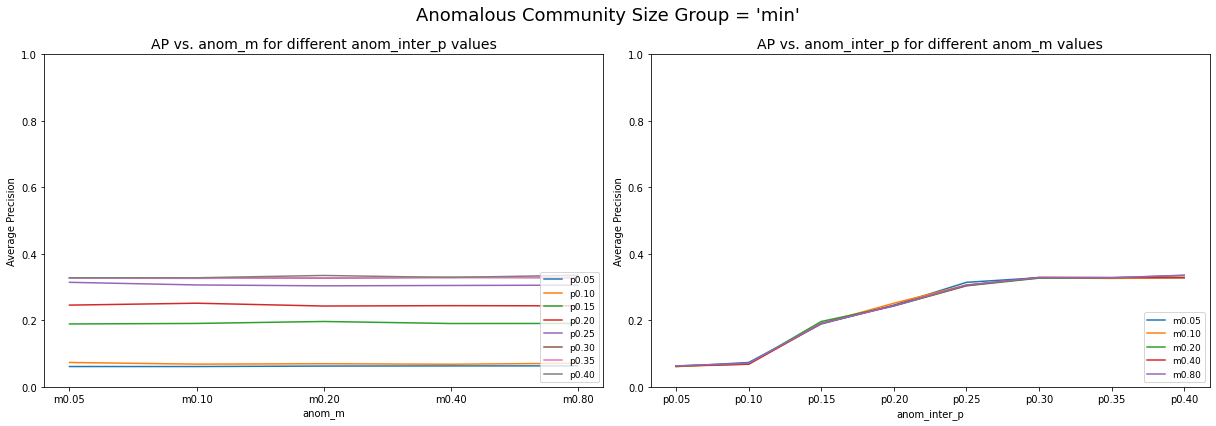

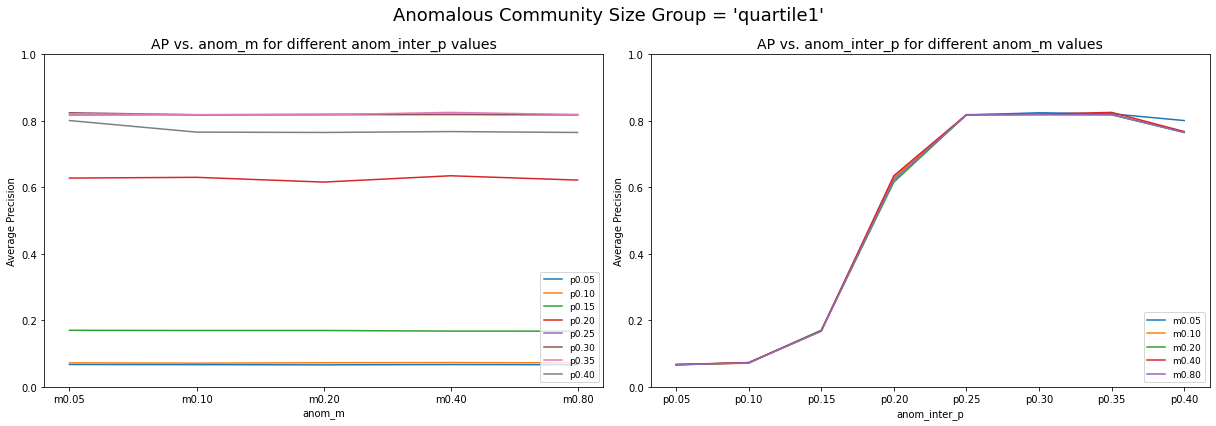

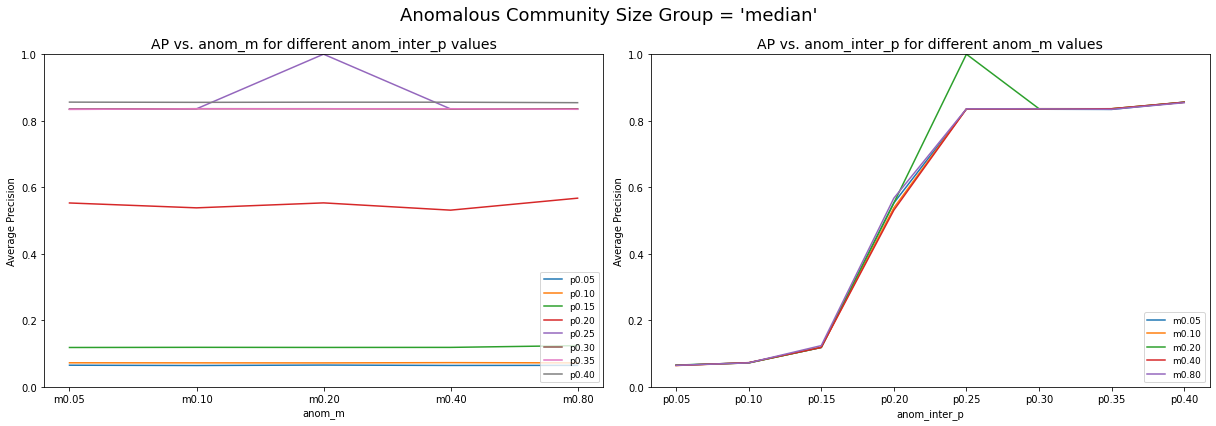

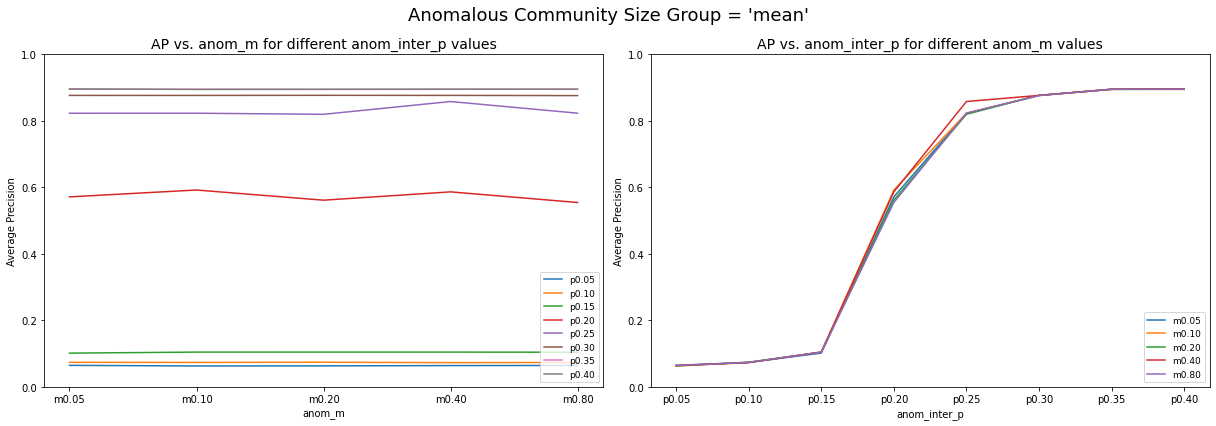

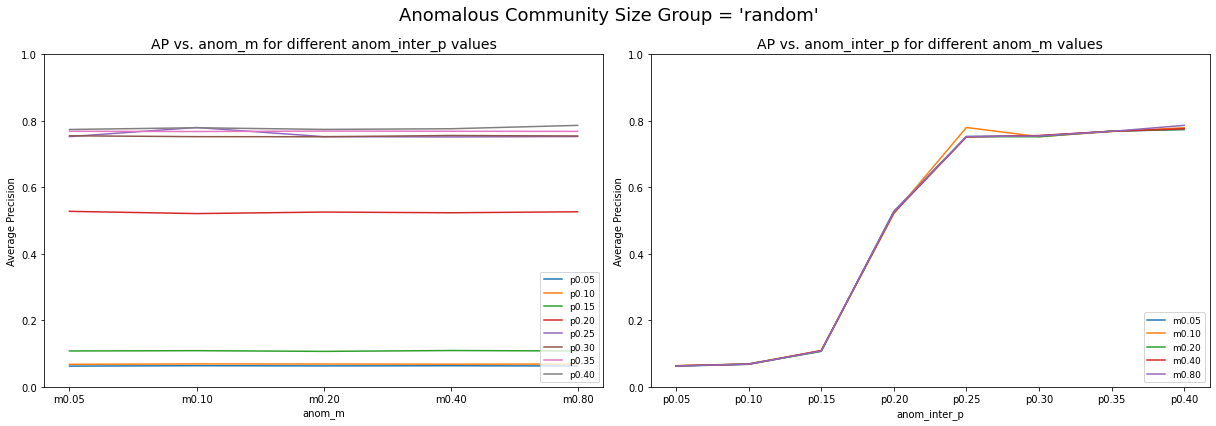

In [15]:
res_analyzer.plot_grouped_by_size_groups_ps_and_ms('normality_prob_std')

In [16]:
size_group_comparison_df = res_analyzer.get_size_groups_comparison_df('normality_prob_std')
size_group_comparison_df

,min,quartile1,median,mean,random
anom_m,,,,,
p0.05,0.062,0.067,0.065,0.064,0.063
p0.10,0.070,0.072,0.072,0.074,0.069
p0.15,0.192,0.169,0.120,0.104,0.108
p0.20,0.246,0.626,0.549,0.573,0.525
p0.25,0.307,0.818,0.868,0.829,0.758
p0.30,0.328,0.820,0.836,0.876,0.754
p0.35,0.328,0.820,0.835,0.895,0.768
p0.40,0.331,0.773,0.855,0.895,0.778


In [17]:
size_group_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,min,quartile1,median,mean,random
mean,0.233,0.521,0.525,0.539,0.478
median,0.276,0.699,0.692,0.701,0.639
std,0.114,0.353,0.378,0.393,0.340
